In [1]:
!pip install torch torchvision

In [12]:
import torch
from torchvision import datasets, transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])






In [ ]:
train_dataset = datasets.EMNIST(root='./data', split='letters', train=True, transform=transform, download=True)
test_dataset = datasets.EMNIST(root='./data', split='letters', train=False, transform=transform, download=True)

# Filter out uppercase letters. Lowercase letters are labeled 1-26.
train_dataset = [data for data in train_dataset if 1 <= data[1] <= 26]
test_dataset = [data for data in test_dataset if 1 <= data[1] <= 26]

In [13]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)


In [14]:
from torchvision.models import resnet18

model = resnet18(pretrained=True)
model.conv1 = torch.nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
model.fc = torch.nn.Linear(model.fc.in_features, 26)


In [15]:
import torch.optim as optim

criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(10):  # loop over the dataset multiple times
    model.train()
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device) - 1  # labels should start from 0

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    # Print statistics, validate on the test set, etc.
    print(f"Epoch {epoch+1} completed")

print('Finished Fine-tuning')


Epoch 1 completed
Epoch 2 completed
Epoch 3 completed
Epoch 4 completed
Epoch 5 completed
Epoch 6 completed
Epoch 7 completed
Epoch 8 completed
Epoch 9 completed
Epoch 10 completed
Finished Fine-tuning


In [16]:
# Define a path to save the weights
model_save_path = "resnet18_emnist_weights.pth"

# Save the model's state_dict
torch.save(model.state_dict(), model_save_path)


In [17]:
classes = [chr(i) for i in range(ord('a'), ord('z')+1)]
class_correct = list(0. for _ in classes)
class_total = list(0. for _ in classes)


In [18]:
model.eval()
with torch.no_grad():
    for data in test_loader:
        images, labels = data[0].to(device), data[1].to(device) - 1  # Remember to offset labels to start from 0
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()

        for i in range(len(labels)):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


In [19]:
for i in range(26):  # 26 classes for lowercase alphabets
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))


Accuracy of     a : 96 %
Accuracy of     b : 97 %
Accuracy of     c : 96 %
Accuracy of     d : 95 %
Accuracy of     e : 98 %
Accuracy of     f : 94 %
Accuracy of     g : 85 %
Accuracy of     h : 93 %
Accuracy of     i : 69 %
Accuracy of     j : 95 %
Accuracy of     k : 97 %
Accuracy of     l : 81 %
Accuracy of     m : 99 %
Accuracy of     n : 95 %
Accuracy of     o : 97 %
Accuracy of     p : 98 %
Accuracy of     q : 84 %
Accuracy of     r : 96 %
Accuracy of     s : 96 %
Accuracy of     t : 97 %
Accuracy of     u : 93 %
Accuracy of     v : 94 %
Accuracy of     w : 96 %
Accuracy of     x : 97 %
Accuracy of     y : 95 %
Accuracy of     z : 98 %


In [29]:
# Assuming 'test_dataset' is already loaded with EMNIST data

# Define label numbers for 'p' and 'q'
# 'a' is 1, 'b' is 2, ... , 'z' is 26
p_label = ord('p') - ord('a') + 1
q_label = ord('q') - ord('a') + 1

# Count the occurrences
p_count = sum(1 for _, label in test_dataset if label == p_label)
q_count = sum(1 for _, label in test_dataset if label == q_label)

print(f"Number of 'p' images: {p_count}")
print(f"Number of 'q' images: {q_count}")


Number of 'p' images: 800
Number of 'q' images: 800


In [30]:
p_image = None
for image, label in test_dataset:
    if label == p_label:
        p_image = image
        break

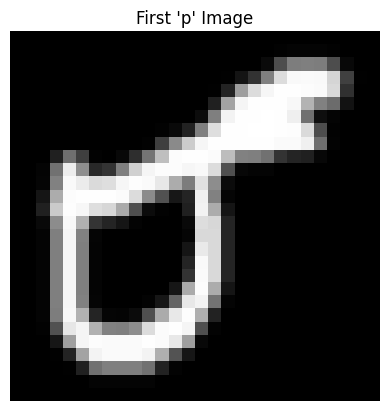

In [31]:
import matplotlib.pyplot as plt

# Convert tensor image to numpy for visualization
p_image_np = p_image.squeeze().numpy()  # Removing channel dimension, if it exists

# Display the image
plt.imshow(p_image_np, cmap='gray')
plt.title("First 'p' Image")
plt.axis('off')  # Hide axes
plt.show()


In [32]:
from torchvision.transforms import ToPILImage

to_pil = ToPILImage()
p_image_pil = to_pil(p_image)


In [33]:
file_name = "p.png"
p_image_pil.save(file_name)


In [34]:
from google.colab import files
files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [137]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms

# Define a transform to convert data to tensor
transform = transforms.Compose([transforms.ToTensor()])

# Download the EMNIST dataset with 'letters' split for testing
emnist_test = datasets.EMNIST(root='./data', train=False, transform=transform, split='letters', download=True)

# Filter images with label 17 (corresponding to 'q' in 'letters' split) and get the first 100 images
q_images = [image for image, label in emnist_test if label == 17][:200]


ValueError: ignored

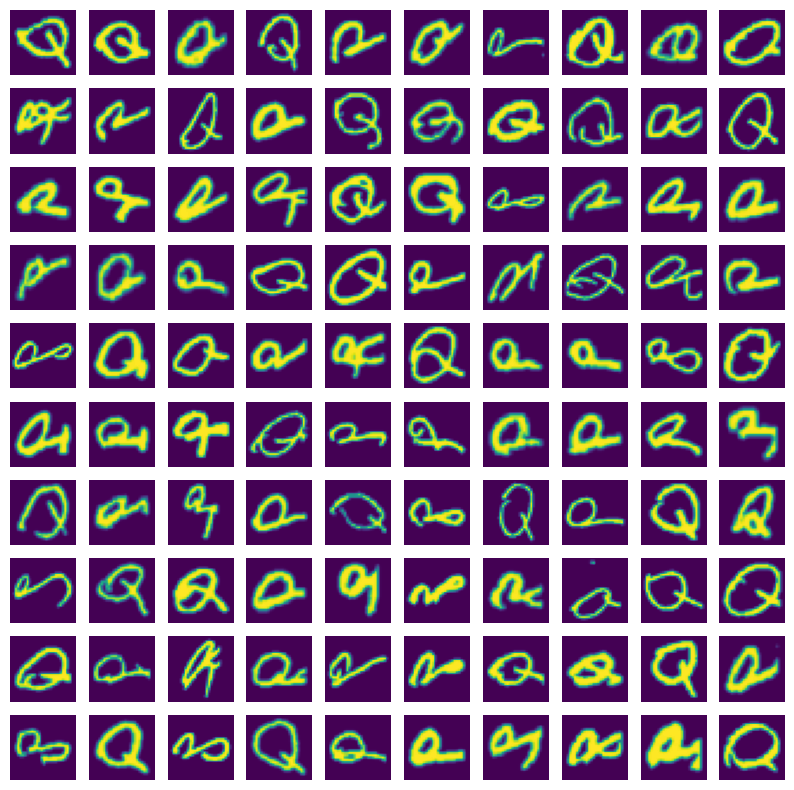

In [138]:
import matplotlib.pyplot as plt
import numpy as np

# Function to show an image
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')

# Plotting images in a grid
fig = plt.figure(figsize=(10, 10))

for index, image in enumerate(q_images):
    ax = fig.add_subplot(10, 10, index + 1)
    imshow(image)
    ax.axis('off')

plt.tight_layout()
plt.show()


In [116]:
import os
from torchvision.transforms import ToPILImage
from IPython.display import FileLink
import shutil

# Convert tensor to PIL Image
to_pil = ToPILImage()

# Create a directory to save images
save_dir = 'q_images'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Save images in grayscale
for index, image in enumerate(q_images):
    img_pil = to_pil(image)
    img_pil = img_pil.convert('L')  # Convert to grayscale
    img_pil.save(os.path.join(save_dir, f'q_{index}.png'))

# Zip the directory
shutil.make_archive(save_dir, 'zip', save_dir)

# Provide the zip for download (specifically for Google Colab)
FileLink(f'{save_dir}.zip')


/content/q_images.zip

In [117]:
from google.colab import files

# Trigger the download
files.download(f'{save_dir}.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [109]:
import os
image_folder = "/content/drive/MyDrive/p_q_b_d_study/emnist_p"
desired_images = ['q_0.png', 'q_90.png', 'q_180.png']
image_paths = [os.path.join(image_folder, img_name) for img_name in desired_images if os.path.exists(os.path.join(image_folder, img_name))]

In [111]:
from PIL import Image
import matplotlib.pyplot as plt

for path in image_paths:
    img = Image.open(path).convert("RGB")
    plt.imshow(img)
    plt.title(os.path.basename(path))
    plt.axis('off')
    plt.show()

In [40]:
def get_image_prediction(model, image_tensor):
    model.eval()
    with torch.no_grad():
        image_tensor = image_tensor.unsqueeze(0).to(device)
        outputs = model(image_tensor)
        probs = nn.Softmax(dim=1)(outputs)
        p_score, q_score = probs[0][16].item(), probs[0][17].item()  # Adjusted indices for 'p' and 'q'
    return p_score, q_score

transform = transforms.Compose([transforms.Grayscale(num_output_channels=1), transforms.Resize((224, 224)), transforms.ToTensor()])
tensor_images = [transform(Image.open(path).convert('RGB')) for path in image_paths]

In [42]:
import torch
import torchvision
from torchvision import transforms
from torchvision.models import resnet18
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim

In [43]:
for image_tensor, path in zip(tensor_images, image_paths):
    p_score, q_score = get_image_prediction(model, image_tensor)
    print(f"Image: {os.path.basename(path)}, p: {p_score:.4f}, q: {q_score:.4f}")

Image: p_0.png, p: 0.0402, q: 0.0327
Image: p_90.png, p: 0.0407, q: 0.0344
Image: p_180.png, p: 0.0372, q: 0.0297


## Ablating Certain Layers

In [139]:
model

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Identity()
  (layer2): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (downsample): Sequential(
        (0): Conv2d(64, 128, kernel_size=(1, 1), stride=(2, 2), bias=False)
        (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    

In [46]:
import copy

layer_1_ablated = copy.deepcopy(model)


In [50]:
import torch.nn as nn

def ablate_layer_with_identity(model, layer_name):
    """Replace the given layer of the model with an Identity layer."""
    ablated_model = copy.deepcopy(model)  # Start with a deep copy of the original model

    for name, module in ablated_model.named_children():  # We use named_children here to replace at the top-level
        if name == layer_name:
            setattr(ablated_model, name, nn.Identity())
            break  # Exit loop once the target layer is replaced

    return ablated_model



In [58]:
transform = transforms.Compose([transforms.Grayscale(num_output_channels=1), transforms.Resize((224, 224)), transforms.ToTensor()])
tensor_images = [transform(Image.open(path).convert('RGB')) for path in image_paths]


In [60]:
layer1_ablated_model = ablate_layer_with_identity(model, "layer1")

In [63]:
for image_tensor, path in zip(tensor_images, image_paths):
    p_score, q_score = get_image_prediction(layer1_ablated_model, image_tensor)
    print(f"Image: {os.path.basename(path)}, p: {p_score:.4f}, q: {q_score:.4f}")

Image: p_0.png, p: 0.0172, q: 0.0586
Image: p_90.png, p: 0.0219, q: 0.0653
Image: p_180.png, p: 0.0271, q: 0.0506


#### Ablating Layer 2

In [75]:
class AdjustChannelsAndResolution(nn.Module):
    def __init__(self, in_channels, out_channels, stride):
        super(AdjustChannelsAndResolution, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False)

        # Initialize the conv layer's weights to identity mapping (or close to it) and freeze them
        with torch.no_grad():
            self.conv.weight.fill_(0)
            for i in range(min(in_channels, out_channels)):
                self.conv.weight[i, i, 0, 0] = 1
        self.conv.weight.requires_grad = False

    def forward(self, x):
        return self.conv(x)


In [76]:
class ResNet18Layer2Ablated(nn.Module):
    def __init__(self, original_model):
        super(ResNet18Layer2Ablated, self).__init__()

        # Adjusting the first conv layer to accept 1 channel
        self.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = original_model.bn1
        self.relu = original_model.relu
        self.maxpool = original_model.maxpool
        self.layer1 = original_model.layer1

        # Replacing layer2 with the adjustment layer for down-sampling and increasing channels
        self.layer2 = AdjustChannelsAndResolution(64, 128, stride=2)

        self.layer3 = original_model.layer3
        self.layer4 = original_model.layer4
        self.avgpool = original_model.avgpool
        self.fc = original_model.fc

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)

        # Now, pass through the adjustment layer (which was layer2)
        x = self.layer2(x)

        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)

        return x

# Create the ablated model with layer2 replaced
original_model = model
layer2_ablated_model = ResNet18Layer2Ablated(model)


In [77]:
# Ensure the model is on the correct device (e.g., "cuda" if you're using a GPU)
device = "cuda" if torch.cuda.is_available() else "cpu"
layer2_ablated_model.to(device)

# Get predictions for each image using the provided function
predictions = [get_image_prediction(layer2_ablated_model, img) for img in tensor_images]

# Display the results
for path, (p_score, q_score) in zip(image_paths, predictions):
    print(f"Image: {os.path.basename(path)}, p: {p_score:.4f}, q: {q_score:.4f}")


Image: p_0.png, p: 0.0000, q: 0.0000
Image: p_90.png, p: 0.0000, q: 0.0000
Image: p_180.png, p: 0.0000, q: 0.0000


### ResNet Ablated 3

In [80]:
class ResNet18Layer3Ablated(nn.Module):
    def __init__(self, original_model):
        super(ResNet18Layer3Ablated, self).__init__()

        # Adjusting the first conv layer to accept 1 channel
        self.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = original_model.bn1
        self.relu = original_model.relu
        self.maxpool = original_model.maxpool
        self.layer1 = original_model.layer1
        self.layer2 = original_model.layer2

        # Replacing layer3 with the adjustment layer for down-sampling and increasing channels
        self.layer3 = AdjustChannelsAndResolution(128, 256, stride=2)

        self.layer4 = original_model.layer4
        self.avgpool = original_model.avgpool
        self.fc = original_model.fc

    def forward(self, x):
        # ... (similar to the layer2 ablated model)
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)

        # Now, pass through the adjustment layer (which was layer2)
        x = self.layer2(x)

        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)

        return x

# Create the ablated model with layer3 replaced
layer3_ablated_model = ResNet18Layer3Ablated(model)


In [83]:
class ResNet18Layer4Ablated(nn.Module):
    def __init__(self, original_model):
        super(ResNet18Layer4Ablated, self).__init__()

        # Adjusting the first conv layer to accept 1 channel
        self.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = original_model.bn1
        self.relu = original_model.relu
        self.maxpool = original_model.maxpool
        self.layer1 = original_model.layer1
        self.layer2 = original_model.layer2
        self.layer3 = original_model.layer3

        # Replacing layer4 with the adjustment layer for down-sampling and increasing channels
        self.layer4 = AdjustChannelsAndResolution(256, 512, stride=2)

        self.avgpool = original_model.avgpool
        self.fc = original_model.fc

    def forward(self, x):
      x = self.conv1(x)
      x = self.bn1(x)
      x = self.relu(x)
      x = self.maxpool(x)

      x = self.layer1(x)

      # Now, pass through the adjustment layer (which was layer2)
      x = self.layer2(x)

      x = self.layer3(x)
      x = self.layer4(x)

      x = self.avgpool(x)
      x = torch.flatten(x, 1)
      x = self.fc(x)

      return x

        # ... (similar to the layer2 and layer3 ablated models)

# Create the ablated model with layer4 replaced
layer4_ablated_model = ResNet18Layer4Ablated(model)


In [84]:
# Ensure the models are on the correct device
layer3_ablated_model.to(device)
layer4_ablated_model.to(device)

# Get predictions for each image using the provided function
predictions_layer3 = [get_image_prediction(layer3_ablated_model, img) for img in tensor_images]
predictions_layer4 = [get_image_prediction(layer4_ablated_model, img) for img in tensor_images]

# Display the results
print("For layer3 ablated:")
for path, (p_score, q_score) in zip(image_paths, predictions_layer3):
    print(f"Image: {os.path.basename(path)}, p: {p_score:.4f}, q: {q_score:.4f}")

print("\nFor layer4 ablated:")
for path, (p_score, q_score) in zip(image_paths, predictions_layer4):
    print(f"Image: {os.path.basename(path)}, p: {p_score:.4f}, q: {q_score:.4f}")


For layer3 ablated:
Image: p_0.png, p: 0.0000, q: 0.0000
Image: p_90.png, p: 0.0000, q: 0.0000
Image: p_180.png, p: 0.0000, q: 0.0000

For layer4 ablated:
Image: p_0.png, p: 0.0335, q: 0.0433
Image: p_90.png, p: 0.0335, q: 0.0433
Image: p_180.png, p: 0.0345, q: 0.0436


In [100]:
import os
import re

# Assuming the folder with images is named 'folder_path'
folder_path = '/content/drive/MyDrive/p_q_b_d_study/emnist_p_images'
image_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

pattern = r'p_(\d+)_(\d+)\.png'
grouped_image_paths = {}

def sorting_key(x):
    match = re.match(pattern, os.path.basename(x))
    if match:
        return int(match.group(1))
    return float('inf')  # Return a large value if no match is found

count = 0
max_count = 10  # Limit to the first 10 images

for path in sorted(image_paths, key=sorting_key):
    match = re.match(pattern, os.path.basename(path))
    if match:
        number, orientation = match.groups()
        if number not in grouped_image_paths:
            grouped_image_paths[number] = {}
            count += 1  # Increment the count when a new number is encountered
        grouped_image_paths[number][orientation] = path

    # Break out of the loop once we have processed 10 images
    if count >= max_count:
        break


In [124]:
import os
import re

# Assuming the folder with images is named 'folder_path'
folder_path_2 = '/content/drive/MyDrive/p_q_b_d_study/emnist_q_images'
image_paths_2 = [os.path.join(folder_path_2, f) for f in os.listdir(folder_path_2) if os.path.isfile(os.path.join(folder_path_2, f))]




In [125]:
image_paths_2

['/content/drive/MyDrive/p_q_b_d_study/emnist_q_images/q_43_flipped_180.png',
 '/content/drive/MyDrive/p_q_b_d_study/emnist_q_images/q_73_180.png',
 '/content/drive/MyDrive/p_q_b_d_study/emnist_q_images/q_51_flipped_0.png',
 '/content/drive/MyDrive/p_q_b_d_study/emnist_q_images/q_60_flipped_90.png',
 '/content/drive/MyDrive/p_q_b_d_study/emnist_q_images/q_98_90.png',
 '/content/drive/MyDrive/p_q_b_d_study/emnist_q_images/q_75_flipped_90.png',
 '/content/drive/MyDrive/p_q_b_d_study/emnist_q_images/q_86_90.png',
 '/content/drive/MyDrive/p_q_b_d_study/emnist_q_images/q_39_flipped_180.png',
 '/content/drive/MyDrive/p_q_b_d_study/emnist_q_images/q_55_180.png',
 '/content/drive/MyDrive/p_q_b_d_study/emnist_q_images/q_46_flipped_0.png',
 '/content/drive/MyDrive/p_q_b_d_study/emnist_q_images/q_45_180.png',
 '/content/drive/MyDrive/p_q_b_d_study/emnist_q_images/q_48_0.png',
 '/content/drive/MyDrive/p_q_b_d_study/emnist_q_images/q_11_flipped_90.png',
 '/content/drive/MyDrive/p_q_b_d_study/emnist

In [129]:
pattern_2 = r'q_(\d+)_(\d+)\.png'
grouped_image_paths_2 = {}

def sorting_key(x):
    match = re.match(pattern_2, os.path.basename(x))
    if match:
        return int(match.group(1))
    return float('inf')  # Return a large value if no match is found



In [133]:
count = 0
max_count = 10  # Limit to the first 10 images

for path in sorted(image_paths_2, key=sorting_key):
    match = re.match(pattern_2, os.path.basename(path))
    if match:
        number, orientation = match.groups()
        if number not in grouped_image_paths_2:
            grouped_image_paths_2[number] = {}
            count += 1  # Increment the count when a new number is encountered
        grouped_image_paths_2[number][orientation] = path

    # Break out of the loop once we have processed 10 images
    if count >= max_count:
        break

In [134]:
grouped_image_paths_2

{'0': {'180': '/content/drive/MyDrive/p_q_b_d_study/emnist_q_images/q_0_180.png',
  '0': '/content/drive/MyDrive/p_q_b_d_study/emnist_q_images/q_0_0.png',
  '90': '/content/drive/MyDrive/p_q_b_d_study/emnist_q_images/q_0_90.png'},
 '1': {'180': '/content/drive/MyDrive/p_q_b_d_study/emnist_q_images/q_1_180.png',
  '0': '/content/drive/MyDrive/p_q_b_d_study/emnist_q_images/q_1_0.png',
  '90': '/content/drive/MyDrive/p_q_b_d_study/emnist_q_images/q_1_90.png'},
 '2': {'0': '/content/drive/MyDrive/p_q_b_d_study/emnist_q_images/q_2_0.png',
  '180': '/content/drive/MyDrive/p_q_b_d_study/emnist_q_images/q_2_180.png',
  '90': '/content/drive/MyDrive/p_q_b_d_study/emnist_q_images/q_2_90.png'},
 '3': {'180': '/content/drive/MyDrive/p_q_b_d_study/emnist_q_images/q_3_180.png',
  '0': '/content/drive/MyDrive/p_q_b_d_study/emnist_q_images/q_3_0.png',
  '90': '/content/drive/MyDrive/p_q_b_d_study/emnist_q_images/q_3_90.png'},
 '4': {'0': '/content/drive/MyDrive/p_q_b_d_study/emnist_q_images/q_4_0.png'

In [102]:
def get_scores_for_all_orientations(model, grouped_paths):
    scores = {}
    for number, paths in grouped_paths.items():
        scores[number] = {}
        for orientation, path in paths.items():
            image_tensor = transform(Image.open(path).convert('RGB'))  # Assuming 'transform' is defined as before
            p_score, q_score = get_image_prediction(model, image_tensor)
            scores[number][orientation] = {'p': p_score, 'q': q_score}
    return scores


In [103]:
def calculate_mean_scores(scores):
    total_scores = {'0': {'p': 0, 'q': 0}, '90': {'p': 0, 'q': 0}, '180': {'p': 0, 'q': 0}}
    num_images = len(scores)
    for number, orientations in scores.items():
        for orientation, values in orientations.items():
            total_scores[orientation]['p'] += values['p']
            total_scores[orientation]['q'] += values['q']

    for orientation in total_scores:
        total_scores[orientation]['p'] /= num_images
        total_scores[orientation]['q'] /= num_images
    return total_scores


In [104]:
import matplotlib.pyplot as plt

def visualize_scores(mean_scores):
    orientations = ['0', '90', '180']
    p_scores = [mean_scores[o]['p'] for o in orientations]
    q_scores = [mean_scores[o]['q'] for o in orientations]

    plt.bar(orientations, p_scores, width=0.4, align='center', label='p')
    plt.bar(orientations, q_scores, width=0.4, align='edge', label='q')

    plt.xlabel('Orientation')
    plt.ylabel('Mean Confidence Score')
    plt.title('Mean Confidence Scores for Different Orientations')
    plt.legend()
    plt.show()


In [105]:
import numpy as np

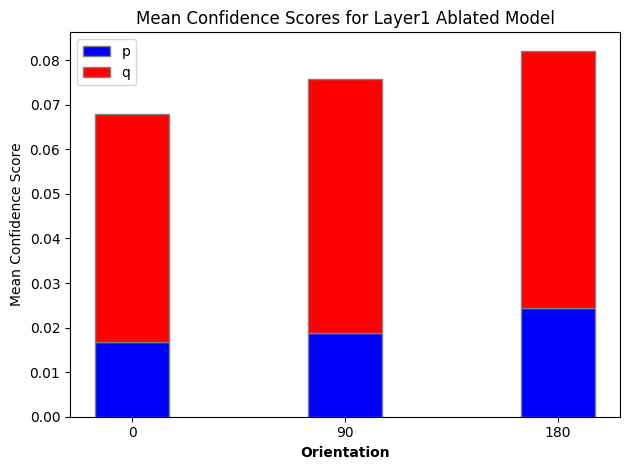

In [106]:
# 2. Get scores for the layer1_ablated_model
scores_layer1_ablated = get_scores_for_all_orientations(layer1_ablated_model, grouped_image_paths)

# 3. Compute mean scores for layer1_ablated_model
mean_scores_layer1_ablated = calculate_mean_scores(scores_layer1_ablated)

# 4. Visualization
orientations = ['0', '90', '180']
p_scores = [mean_scores_layer1_ablated[o]['p'] for o in orientations]
q_scores = [mean_scores_layer1_ablated[o]['q'] for o in orientations]

bar_width = 0.35
r = np.arange(len(orientations))

plt.bar(r, p_scores, width=bar_width, label='p', color='blue', edgecolor='gray')
plt.bar(r, q_scores, bottom=p_scores, width=bar_width, label='q', color='red', edgecolor='gray')

plt.xlabel('Orientation', fontweight='bold')
plt.xticks(r, orientations)
plt.ylabel('Mean Confidence Score')
plt.title('Mean Confidence Scores for Layer1 Ablated Model')
plt.legend()
plt.tight_layout()

plt.show()

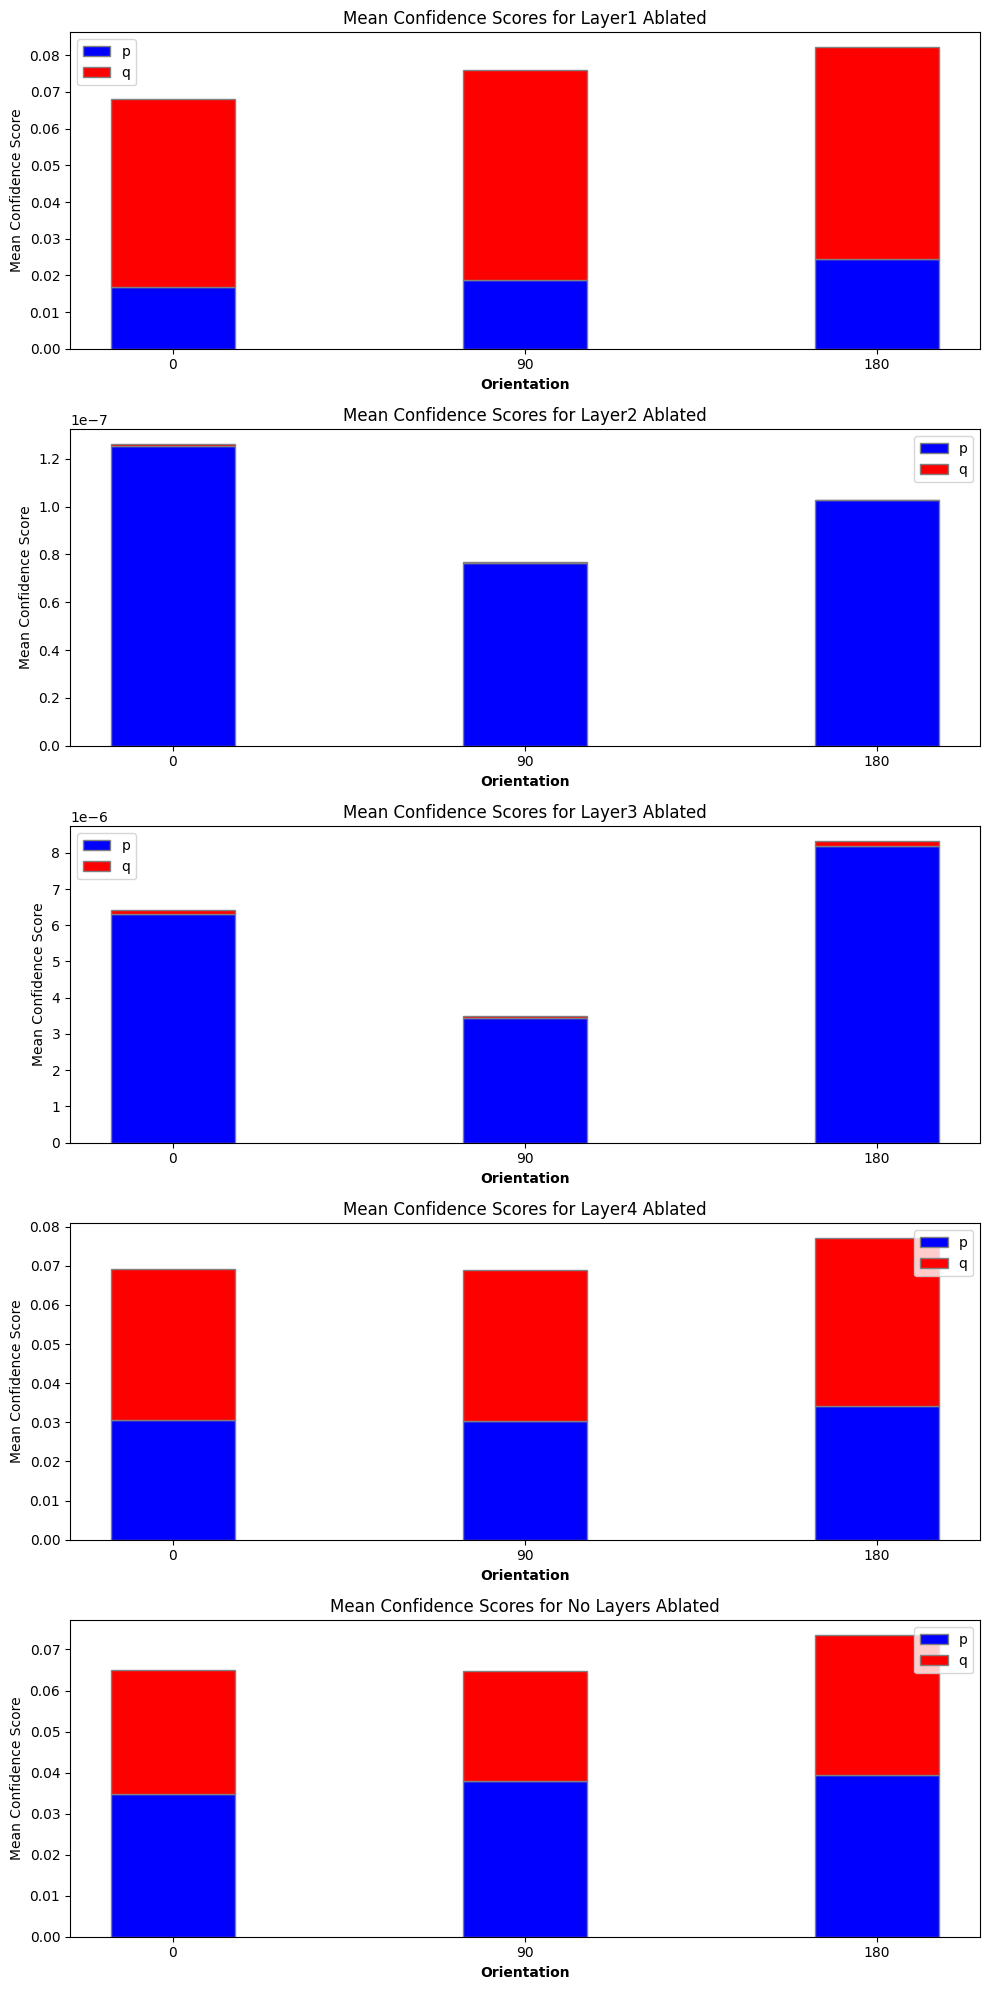

In [107]:
# Create a list of models and their names
models = {
    'Layer1 Ablated': layer1_ablated_model,
    'Layer2 Ablated': layer2_ablated_model,
    'Layer3 Ablated': layer3_ablated_model,
    'Layer4 Ablated': layer4_ablated_model,
    'No Layers Ablated': model  # this is the unaltered model for comparison
}

orientations = ['0', '90', '180']
bar_width = 0.35
r = np.arange(len(orientations))

# Create subplots for each model
fig, axs = plt.subplots(nrows=len(models), figsize=(10, 20))

for ax, (model_name, model) in zip(axs, models.items()):
    # 2. Get scores for the current model
    scores_model = get_scores_for_all_orientations(model, grouped_image_paths)

    # 3. Compute mean scores for the current model
    mean_scores_model = calculate_mean_scores(scores_model)

    # Extract p and q scores for the orientations
    p_scores = [mean_scores_model[o]['p'] for o in orientations]
    q_scores = [mean_scores_model[o]['q'] for o in orientations]

    # Plotting
    ax.bar(r, p_scores, width=bar_width, label='p', color='blue', edgecolor='gray')
    ax.bar(r, q_scores, bottom=p_scores, width=bar_width, label='q', color='red', edgecolor='gray')
    ax.set_xlabel('Orientation', fontweight='bold')
    ax.set_xticks(r)
    ax.set_xticklabels(orientations)
    ax.set_ylabel('Mean Confidence Score')
    ax.set_title(f'Mean Confidence Scores for {model_name}')
    ax.legend()

plt.tight_layout()
plt.show()


1. p, q -> HIGH PERFORMANCE
2. p -> 0, 90, 180
3. TEST RESULT : 100 IMAGES (test set) 800 TESTSET (100)

RANDOM SELECTION WITHIN P TEST SET

EACH RANDOMLY SELECTED RANDOM IMAGE (100)
ORIENTATIONS OF IT (0, 90, 180)
P -> 0, 90, 180

  INPUT -> IMAGE() ->    RESNET (IMAGENET + FINETUNED EMNIST) -> OUTPUT (2 SCORES, P, Q)

  1. AVERAGE

  2. 5 MODELS : RESNET (IMAGENET + FINETUNED EMNIST)
    1. LAYERS ABLATED
      1, 2, 3, 4, NO LAYERS


4. 0 : 100 (AVERAGE), 90: 100 (AVERAGE)
5.

## ANOTHER TEST: DECIDED DURING MEETING

1. KEEP TESTING SET PURE - GIVE PROPER DISCRIMINATION
2. 2 DIFFERENT 🇰






TRAINING SET: -> IMAGENET, NO IMAGENET, + FINETUNE HAS TO BE THERE


1. P, Q (SAME IMAGE, BUT FLIPPED HORIZONTALLY)


2. USE IT TO TRAIN MODEL (SAME IMAGES OF P, Q)


TAKE TEST SET:


1. TAKE THE SAME IMAGE FLIP IT HORIZONTALLY

THEN ABLATE, AND LOOK AT THE CONFIDENCE SCORES.









2 DIFFERENT EXPERIMENTS -

1. SIMILARITY SCORES : LOOK AT ALL 26 LETTERS -> HEATMAP -> CONFIDENCE SCORES

1. DO Q LETTERS BUT BIG Q ONLY (CONFIDENCE SCORE COMPARISON) (P, Q) CONFIDENCE SCORES, IF THE CONTRAST LETTER IS NOT PICKED

WHAT IS BEING PICKED? WHAT IS THE HIGHEST NEXT MAX (GIVE ALL LETTER CONFIDENCE SCORES IN DESCENDING ORDER)

2. DO Q LETTERS BUT ONLY SMALL Q (CONFIDENCE SCORE COMPARISON)(P, Q) CONFIDENCE SCORES


3. CONVERT CONFIDENCE SCORES -> SOFTMAX -> PROBABILITIES



WHAT IS BEING PICKED? WHAT IS THE HIGHEST NEXT MAX (GIVE ALL LETTER CONFIDENCE SCORES IN DESCENDING ORDER)



3.

## No Imagenet : Gives Very Low Accuracy on the Feature Sets

In [ ]:
from torchvision.models import resnet18

model_no_pretrain = resnet18(pretrained=False)
model_no_pretrain.conv1 = torch.nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
model_no_pretrain.fc = torch.nn.Linear(model_no_pretrain.fc.in_features, 26)

In [ ]:
import torch.optim as optim

criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_no_pretrain.to(device)

for epoch in range(20):  # loop over the dataset multiple times
    model_no_pretrain.train()
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device) - 1  # labels should start from 0

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model_no_pretrain(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    # Print statistics, validate on the test set, etc.
    print(f"Epoch {epoch+1} completed")

print('Finished Fine-tuning')


In [ ]:
# Define a path to save the weights
model_save_path = "resnet18_no_pretrain_emnist_weights.pth"

# Save the model's state_dict
torch.save(model_no_pretrain.state_dict(), model_save_path)

In [ ]:
model_no_pretrain.eval()
with torch.no_grad():
    for data in test_loader:
        images, labels = data[0].to(device), data[1].to(device) - 1  # Remember to offset labels to start from 0
        outputs = model_no_pretrain(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()

        for i in range(len(labels)):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

In [ ]:
for i in range(26):  # 26 classes for lowercase alphabets
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))


In [ ]:
def calculate_mean_scores(scores):
    total_scores = {'0': {'p': 0, 'q': 0}, '90': {'p': 0, 'q': 0}, '180': {'p': 0, 'q': 0}}
    num_images = len(scores)
    for number, orientations in scores.items():
        for orientation, values in orientations.items():
            total_scores[orientation]['p'] += values['p']
            total_scores[orientation]['q'] += values['q']

    for orientation in total_scores:
        total_scores[orientation]['p'] /= num_images
        total_scores[orientation]['q'] /= num_images
    return total_scores
